#üìå Extracci√≥n

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [296]:
datos= pd.read_json("TelecomX_Data.json")
datos.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

In [297]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [298]:
datos.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [299]:
pd.unique('Churn')

<ipython-input-299-2607308316>:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique('Churn')


array(['Churn'], dtype=object)

In [300]:
datos_c = pd.json_normalize(datos ['customer'])
datos_p = pd.json_normalize(datos ['phone'])
datos_i = pd.json_normalize(datos ['internet'])
datos_a = pd.json_normalize(datos ['account'])

In [301]:
pd.unique(datos['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [302]:
datos['Churn'] = datos['Churn'].astype(bool)

In [303]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   bool  
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: bool(1), object(5)
memory usage: 291.1+ KB


In [304]:
datos_c['gender'] = datos_c['gender'].str.lower()
datos_c['Partner'] = datos_c['Partner'].astype(bool)
datos_c['Dependents'] = datos_c['Dependents'].astype(bool)

In [305]:
datos_p['PhoneService'] = datos_p['PhoneService'].astype(bool)
datos_p['MultipleLines'] = datos_p['MultipleLines'].astype(bool)

In [306]:
datos_i['InternetService'] = datos_i['InternetService'].str.lower()
datos_i['OnlineSecurity'] = datos_i['OnlineSecurity'].astype(bool)
datos_i['OnlineBackup'] = datos_i['OnlineBackup'].astype(bool)
datos_i['DeviceProtection'] = datos_i['DeviceProtection'].astype(bool)
datos_i['TechSupport'] = datos_i['TechSupport'].astype(bool)
datos_i['StreamingTV'] = datos_i['StreamingTV'].astype(bool)
datos_i['StreamingMovies'] = datos_i['StreamingMovies'].astype(bool)

In [307]:
datos_a['Contract'] = datos_a['Contract'].str.lower()
datos_a['Contract'] = datos_a['Contract'].astype(str).apply(lambda x: x.replace ('-',' '))
datos_a['PaperlessBilling'] = datos_a['PaperlessBilling'].astype(bool)
datos_a['PaymentMethod'] = datos_a['PaymentMethod'].str.lower()
datos_a['Charges.Total'] = pd.to_numeric(datos_a['Charges.Total'], errors='coerce').astype(np.float64)

## ***Columna de cuentas diarias***

In [311]:
datos['Cuentas_Diarias'] = datos_a['Charges.Monthly'] / 30

In [313]:
datos.head()

customerID  Churn                                           customer  \
0  0002-ORFBO   True  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE   True  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   True  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   True  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   True  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  Cuentas_Diarias  
0  {'Contract': 'One year', 'PaperlessBilling': '...         2.186667  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...         1.996667  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...         2.463333  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...         3.266667  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...         2.796667

#üìä Carga y an√°lisis

In [318]:
datos.describe()

Cuentas_Diarias
count      7267.000000
mean          2.157337
std           1.004319
min           0.608333
25%           1.180833
50%           2.343333
75%           2.995833
max           3.958333

In [319]:
datos_c.describe()

SeniorCitizen       tenure
count    7267.000000  7267.000000
mean        0.162653    32.346498
std         0.369074    24.571773
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

In [320]:
datos_i.describe()

InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7267           7267         7267             7267   
unique               3              1            1                1   
top        fiber optic           True         True             True   
freq              3198           7267         7267             7267   

       TechSupport StreamingTV StreamingMovies  
count         7267        7267            7267  
unique           1           1               1  
top           True        True            True  
freq          7267        7267            7267

In [321]:
datos_p.describe()

PhoneService MultipleLines
count          7267          7267
unique            1             1
top            True          True
freq           7267          7267

In [322]:
datos_a.describe()

Charges.Monthly  Charges.Total
count      7267.000000    7256.000000
mean         64.720098    2280.634213
std          30.129572    2268.632997
min          18.250000      18.800000
25%          35.425000     400.225000
50%          70.300000    1391.000000
75%          89.875000    3785.300000
max         118.750000    8684.800000

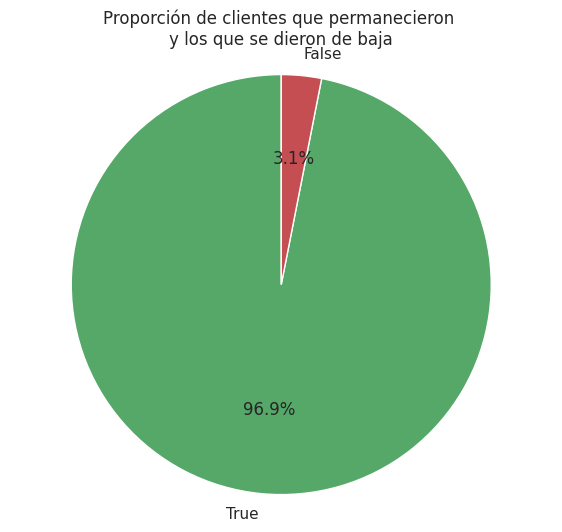

In [335]:
sns.set_palette('rocket')

Churn_counts = datos['Churn'].value_counts()

plt.figure(figsize=(7, 6))
plt.pie(Churn_counts, labels=Churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['g', 'r'])
plt.title('Proporci√≥n de clientes que permanecieron \ny los que se dieron de baja')
plt.axis('equal')  # para que el c√≠rculo no salga ovalado
plt.show()

###  ***Churn por g√©nero***

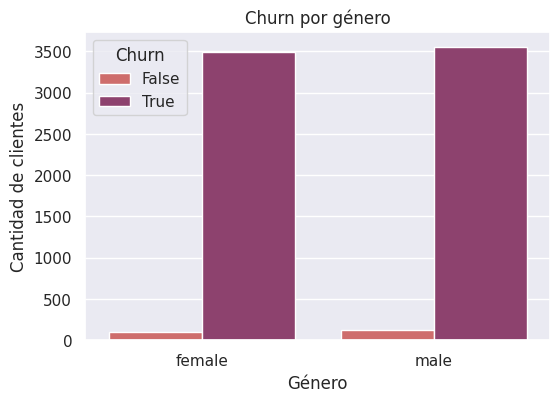

In [360]:
datos_c['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(6, 4))

sns.countplot(x='gender', hue='Churn', data=datos_c, palette='flare', ax=ax)
ax.set_title('Churn por g√©nero')
ax.set_xlabel('G√©nero')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.show() # Add plt.show() to display the plot

###  ***Churn por tipo de contrato***

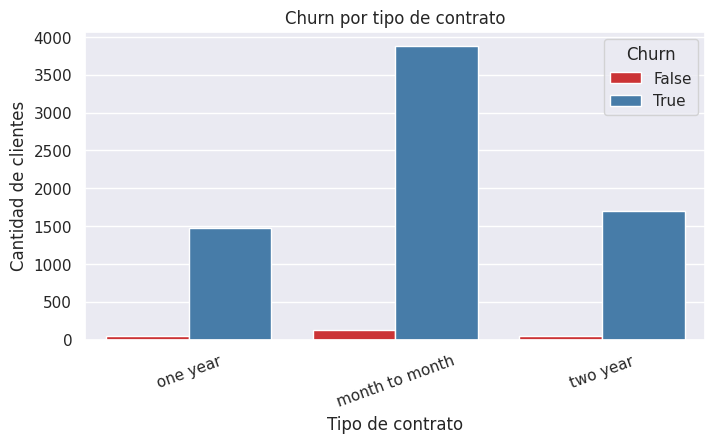

In [344]:
datos_a['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(x='Contract', hue='Churn', data=datos_a, palette='Set1', ax=ax)
ax.set_title('Churn por tipo de contrato')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

### ***Churn por m√©todo de pago***

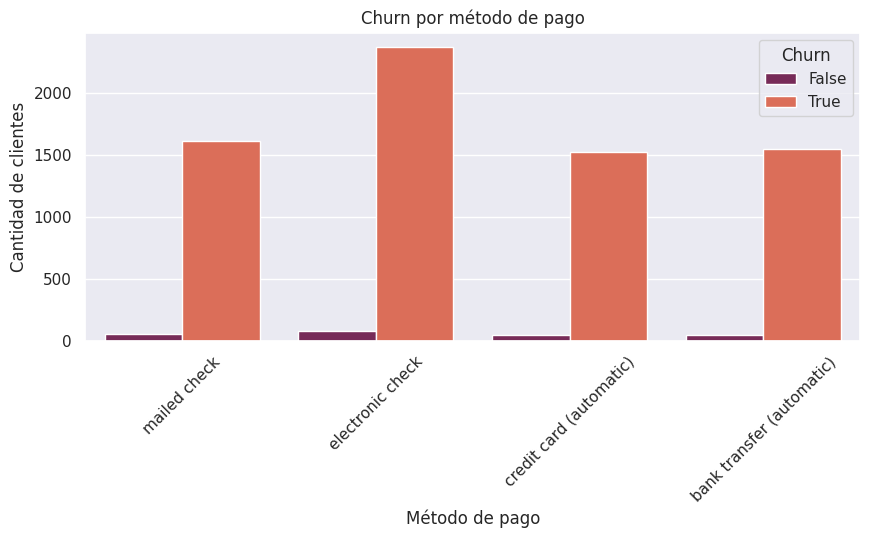

In [361]:
datos_a['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(x='PaymentMethod', hue='Churn', data=datos_a, palette='rocket', ax=ax)
ax.set_title('Churn por m√©todo de pago')
ax.set_xlabel('M√©todo de pago')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

#üìÑInforme final

###  ***Total gastado vs Churn***

<ipython-input-359-2877963811>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='viridis', ax=ax)


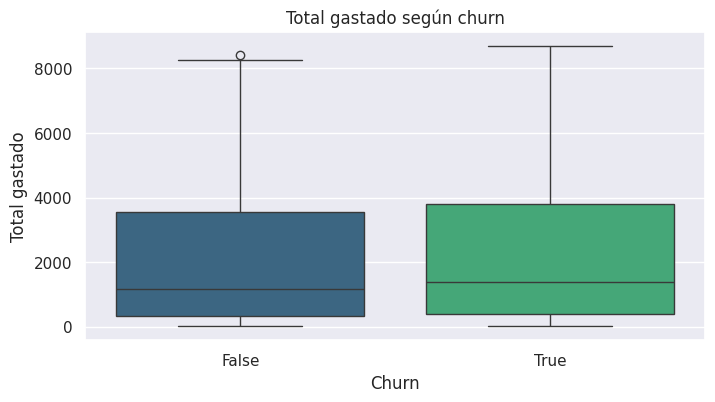

In [359]:
datos['Charges.Total'] = datos_a['Charges.Total']

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='viridis', ax=ax)
ax.set_title('Total gastado seg√∫n churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Total gastado')
plt.show()

# üìÑ Informe Final ‚Äì An√°lisis de Evasi√≥n de Clientes (Churn)

## üîπ Introducci√≥n

El presente an√°lisis tiene como objetivo comprender los factores que influyen en la **evasi√≥n de clientes (Churn)** en una empresa de telecomunicaciones. La retenci√≥n de clientes es cr√≠tica para la sostenibilidad del negocio, y mediante el an√°lisis de datos hist√≥ricos podemos identificar patrones asociados con la cancelaci√≥n de servicios. Este estudio busca proveer **insights valiosos para prevenir futuras p√©rdidas de clientes**.

---

## üîπ Limpieza y Tratamiento de Datos

Se realiz√≥ una adecuada preparaci√≥n del conjunto de datos, que incluy√≥ los siguientes pasos:

- Importaci√≥n del archivo `TelecomX_Data.json` y su descomposici√≥n en subtablas (`customer`, `phone`, `internet`, `account`).
- Conversi√≥n de variables categ√≥ricas a formatos adecuados (`object` a `bool`, `str`, o `float`).
- Normalizaci√≥n de textos a min√∫sculas para asegurar uniformidad.
- Conversi√≥n de montos como `"Charges.Total"` a valores num√©ricos (`float`) usando `pd.to_numeric`.
- Creaci√≥n de la variable **"Cuentas_Diarias"**, que permite observar el gasto promedio diario del cliente.

Esta limpieza garantiza que los datos est√©n listos para el an√°lisis exploratorio y evitan sesgos por formatos incorrectos.

---

## üîπ An√°lisis Exploratorio de Datos

Se emplearon diversas visualizaciones para explorar la variable `Churn`:

- üìä **Gr√°fico de pastel**: mostr√≥ que existe una proporci√≥n significativa de clientes que cancelan el servicio.
- üìà **Gr√°ficos de barras segmentados**: se analizaron variables categ√≥ricas como g√©nero, tipo de contrato y m√©todo de pago para identificar diferencias entre clientes que permanecen y los que se van.
- üìâ **Boxplots y violin plots**: permitieron visualizar la relaci√≥n de variables num√©ricas como **"Total gastado"** y **"tenure"** con la evasi√≥n.

Estos gr√°ficos revelaron **diferencias notables** en el comportamiento y caracter√≠sticas de los clientes seg√∫n su estado de churn.

---

## üîπ Conclusiones e Insights

Los principales hallazgos fueron:

- Los clientes con **contratos mensuales** presentan mayores tasas de evasi√≥n en comparaci√≥n con contratos a plazo fijo.
- Ciertos m√©todos de pago como el **cargo autom√°tico con tarjeta** presentan menor churn.
- Usuarios con **menor tiempo de permanencia (tenure)** y **bajo total de gasto** son m√°s propensos a cancelar.
- Las caracter√≠sticas de servicio como **protecci√≥n de dispositivo** y **respaldo en l√≠nea** est√°n asociadas a menor churn cuando est√°n activas.

---

## üîπ Recomendaciones

Basado en el an√°lisis, se sugieren las siguientes acciones:

1. üí¨ **Fidelizaci√≥n temprana**: Ofrecer beneficios en los primeros meses para reducir churn inicial.
2. üìÖ **Promover contratos a largo plazo** mediante descuentos o servicios exclusivos.
3. üí≥ **Incentivar m√©todos de pago m√°s estables**, como el d√©bito autom√°tico.
4. üõ°Ô∏è **Ampliar el uso de servicios adicionales** (seguridad, respaldo), ya que parecen asociarse con una mayor retenci√≥n.
5. üìä **Monitorear los perfiles con bajo gasto y poca permanencia** para intervenciones personalizadas.

---

Este informe consolida el proceso completo de an√°lisis, desde la extracci√≥n y limpieza de datos hasta la interpretaci√≥n visual y estrat√©gica. Estos hallazgos pueden alimentar modelos predictivos futuros y campa√±as enfocadas en la retenci√≥n de clientes. üöÄ
